In [2]:
from importlib import reload
import capstone as cp
import numpy as np
import pandas as pd
import plotly.graph_objects as go
def plot(x, fn):
    y = map(fn, x)
    go.Figure(data=go.Scatter(x=list(x), y=list(y))).show()
reload(cp)

<module 'capstone' from '/home/sharath/code/capstone/capstone.py'>

dist:0.0 perf:9.4 sz:15.5 mtbf:22000 price:32.578947368421055 rndTimeMonths:1.44 totalScore:1.3585047504204086 revenue:19089683.84901304 sales 585951.5236369107 growthInRev:1.8358794474263525
dist:0.0 perf:9.4 sz:15.5 mtbf:22000 price:33.0 rndTimeMonths:1.44 totalScore:1.3758916180882144 revenue:19027271.68266641 sales 576583.9903838306 growthInRev:1.8065294737874589
dist:0.0 perf:9.4 sz:15.5 mtbf:23000 price:33.0 rndTimeMonths:0.96 totalScore:1.366019763935979 revenue:20014716.009872314 sales 606506.5457537065 growthInRev:1.9002816054946416
dist:0.0 perf:9.4 sz:15.5 mtbf:23000 price:33.10526315789474 rndTimeMonths:0.96 totalScore:1.3703479264271152 revenue:20000618.375258673 sales 604152.2243718836 growthInRev:1.8929051416351446
dist:0.0 perf:9.4 sz:15.5 mtbf:23000 price:33.21052631578947 rndTimeMonths:0.96 totalScore:1.3746755823800614 revenue:19985778.009884935 sales 601790.4630551724 growthInRev:1.8855053672746915
dist:0.0 perf:9.4 sz:15.5 mtbf:23000 price:33.31578947368421 rndTime

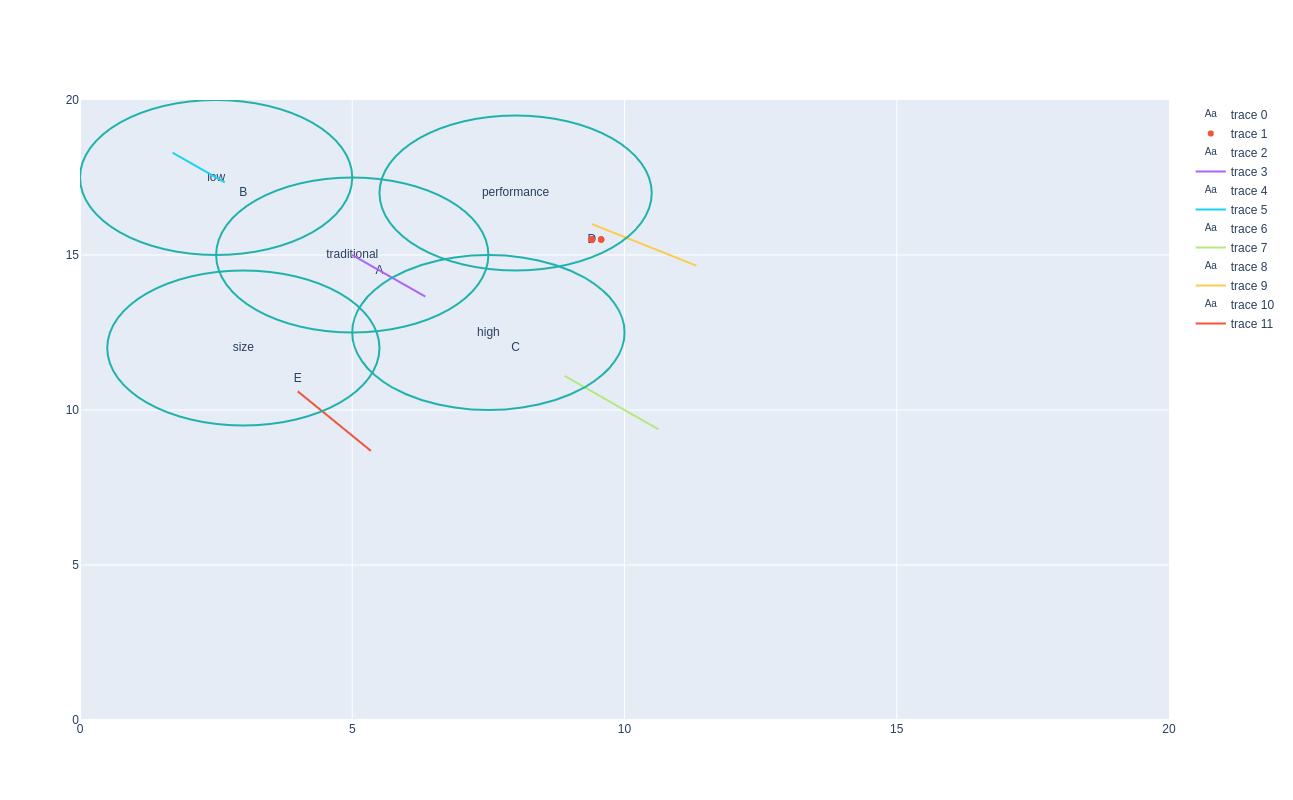

In [9]:
reload(cp)
x = cp.simulate2()
perfX, szY, rndYears = zip(*x)
fig = go.Figure()
fig.update_xaxes(range=[0, 20])
fig.update_yaxes(range=[0, 20])
fig.update_layout(width=800, height=800)
products = [(5.5, 14.5, "A"), (3, 17, "B"), (8, 12, "C"), (9.4, 15.5, "D"), (4, 11, "E")]
x, y, labels = zip(*products)
fig.add_trace(go.Scatter(
    x=x,
    y=y,
    text=labels,
    mode="text",
))

month = np.arange(0, 24, 1)
fig.add_trace(go.Scatter(
x=list(perfX),
y=list(szY),
mode="markers",
))

for segment in cp.segments:
    cx, cy, ix, iy = cp.segments[segment]["pos"]
    dx, dy = cp.segments[segment]["driftPerYear"]
    x0=cx-2.5
    y0=cy-2.5
    x1 = cx+2.5
    y1=cy+2.5
    fig.add_shape(type="circle",
        xref="x", yref="y",
        x0=cx-2.5, y0=cy-2.5, x1 = cx+2.5, y1=cy+2.5,
        line_color="LightSeaGreen",
    )
    fig.add_trace(go.Scatter(
        x=[cx],
        y=[cy],
        text=segment,
        mode="text",
    ))
    segmentX = [[0, ix], [1, ix+dx/12]]
    segmentY = [[0, iy], [1, iy+dy/12]]
    x = list(map(lambda x: cp.yy(segmentX, x, "extrapolate", "extrapolate"), month))
    y = list(map(lambda x: cp.yy(segmentY, x, "extrapolate", "extrapolate"), month))
    fig.add_trace(go.Scatter(
    x=x,
    y=y,
    mode="lines",
    ))


fig.show()


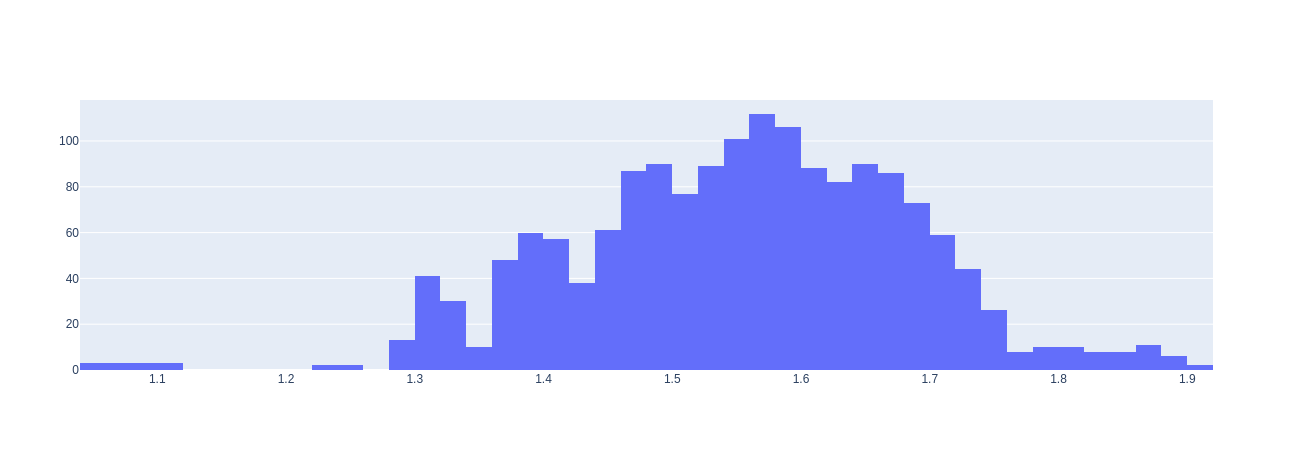

1647


In [8]:
reload(cp)
x = cp.simulate2()
fig = go.Figure(data=[go.Histogram(x=x)])
fig.show()
print(len(x))

In [ ]:
x = np.linspace(0, 24, 50)
plot(x, lambda x: cp.awareness(x, .5))

In [ ]:
#segments
for segment in cp.segments:
    l, u = cp.segments[segment]["age"][0][0], cp.segments[segment]["age"][-1][1]
    print(l, u)
    print(segment)
    plot(np.linspace(l, u, 100), lambda x: cp.age(segment, x))

In [ ]:
# price
for segment in cp.segments:
    l, u = cp.segments[segment]["price"]
    print(l, u)
    print(segment)
    plot(np.linspace(l, u, 100), lambda x: cp.price(segment, x))

In [ ]:
# mtbf
for segment in cp.segments:
    l, u = cp.segments[segment]["mtbf"]
    print(l, u)
    print(segment)
    plot(np.linspace(l-5000, u, 100), lambda x: cp.mtbf(segment, x))

In [ ]:
# position
for segment in cp.segments:
    cx, cy, ix, iy = cp.segments[segment]["pos"]
    x = np.outer(np.linspace(cx-3.54, cx+3.54, 30), np.ones(30))
    y = np.outer(np.linspace(cy-3.54, cy+3.54, 30), np.ones(30)).T
    zipped = zip(np.reshape(x, -1), np.reshape(y, -1))

    def mapper(p):
        x, y = p
        ret = cp.position(segment, x, y)
#         ret = x+y
        return ret
    z = np.reshape(np.fromiter(map(mapper, zipped), float), (30, 30))

    go.Figure(data=go.Surface(x=x, y=y, z=z)).show()



In [ ]:
xx = []
yy = []
zz = []
x, y = np.linspace(0, 10, 9), np.linspace(0, 10, 9)

for i in x:
    for j in y:
        k = i+j
        xx.append(i)
        yy.append(j)
        zz.append(k)

print(yy)
go.Figure(data=go.Surface(x=xx, y=yy, z=zz)).show()
        


In [ ]:
import plotly.graph_objects as go 
import numpy as np 
  
x = np.outer(np.linspace(-2, 2, 30), np.ones(30)) 
y = x.copy().T 
z = np.cos(x ** 2 + y ** 2) 
print(y)
fig = go.Figure(data=[go.Surface(x=x, y=y, z=z)]) 
  
fig.show() 


In [ ]:
x = np.linspace(.2, 8, 100)
aut4 = [[.2, .187], [.4, .246], [.6, .332], [1,.55 ], [2, 1.161], [4, 2.03], [8, 2.569]]
aut5 = [[.2, .248], [.4, .307], [.6, .393], [1, .611], [2, 1.222], [4, 2.091], [8, 2.630]]
aut3 = [[.2, .150], [.4, .209], [.6, .295], [1, .513], [2, 1.124], [4, 1.993], [8, 2.532]]
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=list(map(lambda x: cp.yy(aut3, x)*12, x)),
                    mode='lines+markers',
                    name='aut3'))
fig.add_trace(go.Scatter(x=x, y=list(map(lambda x: cp.yy(aut4, x)*12, x)),
                    mode='lines+markers',
                    name='aut4'))
fig.add_trace(go.Scatter(x=x, y=list(map(lambda x: cp.yy(aut5, x)*12, x)),
                    mode='lines+markers',
                    name='aut5'))
fig.show()

In [ ]:
x = np.linspace(0, .46, 100)
y = list(map(lambda x: cp.y(cp.awarenessSegments, x), x))
fig = go.Figure()
fig.add_trace(go.Scatter(x=y, y=x,
                    mode='lines+markers',
                    name='accesibility'))


In [ ]:
x = np.linspace(.001, .399, 50)
ll = []
for a in x:
    cp.pc = a
    ll.append(cp.testScore())
base, final = zip(*ll)
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=base,
                    mode='lines+markers',
                    name='base'))
fig.add_trace(go.Scatter(x=x, y=final,
                    mode='lines+markers',
                    name='final'))
